## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


**BUSINESS UNDERSTANDING**

As a data scientist analyzing the King County housing market, my business understanding is that the real estate industry is a crucial sector that plays a significant role in the economy. The success of a real estate transaction depends on several factors, including the location, the size of the property, the condition of the property, the amenities, and the current market conditions. The housing market is subject to various external factors such as interest rates, economic conditions, and government policies that can impact the demand and supply of properties.

The dataset contains information about the houses in King County, Seattle. The dataset has 21 variables including the price, number of bedrooms, bathrooms, square footage of the living area, and other variables. The dataset contains 21,597 observations. The scope of this analysis is limited to the data provided. We will use feature engineering techniques such as imputation, normalization, and one-hot encoding to preprocess the data. We will use multiple linear regression model. We will evaluate the performance of the model using metrics such as mean squared error, mean absolute error, and R-squared.

To overcome these challenges, we need to use a combination of quantitative and qualitative analysis techniques and incorporate domain knowledge and expertise. By understanding the King County housing market's complexities and using data-driven insights, we can help real estate agents and property owners make informed decisions about pricing, marketing, and selling their properties, ultimately leading to more successful real estate transactions and a more robust housing market.

**BUSINESS PROBLEM**

A real estate agency from King County, Seattle hired us for a project to analyse how different factors affect prices of homes.The aim of this analysis is to build a multiple linear regression model that predicts the prices of houses in King County, Seattle.

By developing a model that can accurately predict the sale price of houses, real estate agents can better advise their clients on pricing strategies, investors can identify potentially undervalued properties, and homeowners can better estimate the value of their own properties. This can ultimately lead to more efficient and profitable real estate transactions in King County. We will also investigate whether homes sell for higher prices in certain seasons, or whether certain types of homes are more popular in certain seasons.

You are charged with exploring what factors most significantly affect home prices. You must then translate those findings into actionable insights that the real estate agency can use to help decide what factors to consider when advising potential home buyers.

# BUSINESS OBJECTIVES

Develop a pricing model: Create a predictive pricing model that incorporates the factors identified in the regression analysis, such as the number of bathrooms, living area, lot size, and condition and grade ratings. This model can help the agency more accurately price their properties, particularly those with unique features such as waterfront views.

Refine marketing strategies: Use the insights gained from the regression analysis to refine the agency's marketing strategies. For example, the agency can create targeted marketing campaigns that emphasize the features that have the greatest impact on price, such as the number of bathrooms, living area, and condition and grade ratings.

Identify investment opportunities: Use the regression analysis to identify properties that are undervalued based on their features, such as a high number of bathrooms or a waterfront view. The agency can use this information to identify potential investment opportunities that may offer a higher return on investment.

Analyze seasonal trends: Analyze the seasonal trends in home prices and develop strategies for pricing and marketing homes throughout the year. For example, the agency can adjust their pricing and marketing strategies to take advantage of the higher prices in the spring, when homes tend to sell for more.

Optimize home renovations: Use the insights gained from the regression analysis to identify which renovations have the greatest impact on a home's price. This information can be used to guide homeowners who are considering renovations and to help the agency market homes that have been recently renovated.

## Importing the necessary libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import numpy as np
import pandas as pd
pd.options.display.max_columns = 30
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# DATA UNDERSTANDING

In this project, we are analyzing the King County housing market to build a multiple linear regression model that predicts the prices of houses in King County, Seattle.

In [2]:
# Your code here - remember to use markdown cells for comments as well!
house_df=pd.read_csv('kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Getting data information
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
house_df.value_counts()

id          date        price     bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade      sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15
9895000040  7/3/2014    399900.0  2         1.75       1410         1005      1.5     NO          NONE  Average    9 Better   900         510.0          2011      0.0           98027    47.5446  -122.018  1440           1188          1
2768200213  7/24/2014   529000.0  2         2.50       1320         1395      2.0     NO          NONE  Average    8 Good     990         330.0          2014      0.0           98107    47.6689  -122.362  1550           1519          1
2768200210  8/25/2014   499000.0  2         2.50       1320         1157      2.0     NO          NONE  Average    8 Good     990         330.0          2014      0.0           98107    47.6689  -122.363  1550           1519          1
2768200209  10/6/2014   529950.0  2         2.50       1500  

The dataset provided contains information on 21,597 houses in King County, Seattle. The dataset has 21 variables, including the price, the number of bedrooms, bathrooms, living area square footage, lot square footage, number of floors, whether the house is on a waterfront, quality of view from the house, overall condition of the house, overall grade of the house, square footage of the house apart from the basement, square footage of the basement, year when the house was built, year when the house was renovated, ZIP code, latitude coordinate, longitude coordinate, the square footage of interior housing living space for the nearest 15 neighbors, and the square footage of the land lots of the nearest 15 neighbors.

To better understand the data, we identified the categorical and numerical variables in the dataset that is relevant to our business problem.

We chose these columns because they are key features that are often used to determine the value of a residential property in real estate.

NUMERICAL VARIABLES: 


"Living area" (sqft_living) is a measure of the total interior living space of the property, which is a key factor in determining its value.
"Bedrooms" and "bathrooms" are important because they directly affect the functional capacity of the house, which is an important consideration for prospective buyers.
"Location" (zipcode) is a critical factor because different zip codes have different levels of desirability and attractiveness to buyers, and this can significantly affect the value of the property.
"Age" (yr_built) is important because it provides an indication of the property's overall condition and potential maintenance costs, which can also impact its value.

Categorical variables:

Condition: The condition variable describes the overall condition of the house, which is related to maintenance.This variable can help to identify how the condition of a house affects its price. It has five categories, ranging from 1 to 5, with 1 being the poorest condition and 5 being the best. The condition variable is a categorical variable as it has a limited number of values and cannot be measured quantitatively.


### Lets visualize if there are missing values

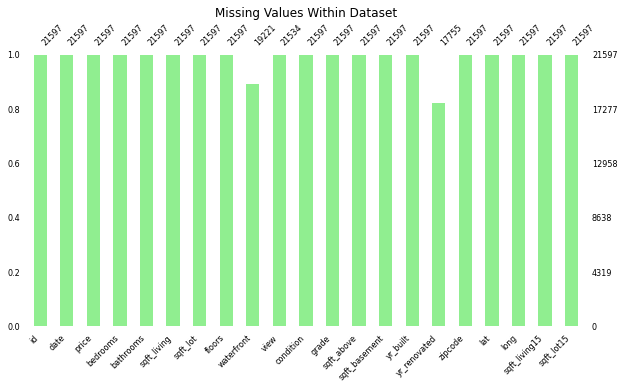

In [7]:
# Visualise the missing values in the dataset
msno.bar(house_df, color='lightgreen', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset');

In [8]:
X_numeric = house_df.select_dtypes('number')
X_numeric.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [9]:
y=house_df['price']

In [10]:
house_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

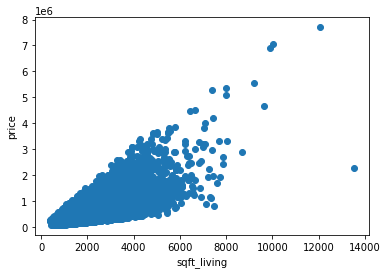

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_numeric['sqft_living'], y)
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
plt.show()

there is a linear relationship between price and sqlt_living

In [12]:
X_numeric['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [13]:
X_numeric['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
X_numeric['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [15]:
X_numeric['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [16]:
X_categorical = house_df.select_dtypes('object')
X_categorical

,date,waterfront,view,condition,grade,sqft_basement
0,10/13/2014,NaN,NONE,Average,7 Average,0.0
1,12/9/2014,NO,NONE,Average,7 Average,400.0
2,2/25/2015,NO,NONE,Average,6 Low Average,0.0
3,12/9/2014,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,NO,NONE,Average,8 Good,0.0
...,...,...,...,...,...,...
21592,5/21/2014,NO,NONE,Average,8 Good,0.0
21593,2/23/2015,NO,NONE,Average,8 Good,0.0
21594,6/23/2014,NO,NONE,Average,7 Average,0.0
21595,1/16/2015,NaN,NONE,Average,8 Good,0.0


In [17]:
X_categorical['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [18]:
X_categorical['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [19]:
X_categorical['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [20]:
X_categorical['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [21]:
y = house_df['price']
X_cat_price = pd.concat([X_categorical, y], axis=1)
X_cat_price.corr()['price'].sort_values(ascending=False)

price    1.0
Name: price, dtype: float64

# DATA PREPARATION

### Use the date feature to create a new feature called season, which represents whether the home was sold in Spring, Summer, Fall, or Winter.

In [22]:
#To create a new feature called "season" in the King County housing dataset,
#we can extract the month information from the "date" column and map it to 
#the corresponding season.

# Convert the date column to a datetime object
house_df['date'] = pd.to_datetime(house_df['date'])

# Extract the month information and map it to the corresponding season
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
           11: 'Fall', 12: 'Winter'}
house_df['season'] = house_df['date'].dt.month.map(seasons)
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Fall
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Spring
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,Winter
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Summer
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,Winter


With the new "season" feature, we can now analyze the King County housing dataset with respect to the season and identify any seasonality trends in 
the housing market. For example, we can investigate whether homes sell for 
higher prices in certain seasons, or whether certain types of homes are more 
popular in certain seasons.

### adding a column to store the age of the houses

In [23]:
# Add house_age column
house_df['age'] = house_df['date'].dt.year - house_df['yr_built']
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Fall,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Winter,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Winter,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Winter,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Winter,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Spring,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,Winter,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Summer,5
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,Winter,11


### removing null values in the 'yr_built" column and adding the 'renovated' column to show whether the house has been renovated or not

In [24]:
house_df.loc[house_df.yr_renovated.isnull(), 'yr_renovated'] = 0
house_df['renovated'] = house_df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season,age,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Fall,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Winter,63,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,Winter,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Winter,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Winter,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Spring,5,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,Winter,1,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Summer,5,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,Winter,11,0


### Add has_basement column that is a binary value

In [25]:
house_df['sqft_basement'] = house_df['sqft_basement'].replace('?', '0').astype('float')
house_df['has_basement'] = house_df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)
house_df['has_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: has_basement, Length: 21597, dtype: int64

# Ordinal Encoding

Ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels

the values in the `condition` and `grade` columns are ordinal, and have been assigned a value based on the quality of the feature. Therefore, we will be ordinal encoding these columns.

### Creating a function that maps the ordinal values in a dataframe column to corresponding numerical values based on a provided dictionary.

In [26]:
def map_ordinal_values(df, col_name, value_dict):
    # map the ordinal values to numerical values using the provided dictionary
    df[col_name] = df[col_name].map(value_dict)
    return df

In [27]:
condition_dict = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}

df = map_ordinal_values(house_df, 'condition', condition_dict)
df = map_ordinal_values(house_df, 'grade', grade_dict)

print(house_df[['condition', 'grade']])


       condition  grade
0              3      7
1              3      7
2              3      6
3              5      7
4              3      8
...          ...    ...
21592          3      8
21593          3      8
21594          3      7
21595          3      8
21596          3      7

[21597 rows x 2 columns]


# One Hot Encoding

One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions.

We shall be encoding the categorical columns (`waterfront` and `view`) using one hot encoding. Furthermore, in order to avoid the "Dummy Variable Trap" (perfect multicollinearity between the independent variables), we will need to drop one of the columns created.

In [28]:
house_df.select_dtypes('object')

,waterfront,view,season
0,NaN,NONE,Fall
1,NO,NONE,Winter
2,NO,NONE,Winter
3,NO,NONE,Winter
4,NO,NONE,Winter
...,...,...,...
21592,NO,NONE,Spring
21593,NO,NONE,Winter
21594,NO,NONE,Summer
21595,NaN,NONE,Winter


creating a function to perform one hot encoding on the specified columns

In [29]:
def one_hot_encode(df, columns):
    df = pd.get_dummies(df, columns=columns, drop_first=False)
    return df

**one hot encoding categorical variable**

In [30]:
columns_to_encode = ['waterfront', 'view', 'season']
house_df = one_hot_encode(house_df, columns_to_encode)
# Preview the dataframe
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,sqft_lot15,age,renovated,has_basement,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,season_Fall,season_Spring,season_Summer,season_Winter
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,...,5650,59,0,0,0,0,0,0,0,0,1,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,...,7639,63,1,1,1,0,0,0,0,0,1,0,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,...,8062,82,0,0,1,0,0,0,0,0,1,0,0,0,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,...,5000,49,0,1,1,0,0,0,0,0,1,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,...,7503,28,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0.0,2009,0.0,98103,...,1509,5,0,0,1,0,0,0,0,0,1,0,1,0,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0.0,2014,0.0,98146,...,7200,1,0,0,1,0,0,0,0,0,1,0,0,0,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0.0,2009,0.0,98144,...,2007,5,0,0,1,0,0,0,0,0,1,0,0,1,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0.0,2004,0.0,98027,...,1287,11,0,0,0,0,0,0,0,0,1,0,0,0,1


In the `waterfront` column, we shall be dropping the `waterfront_NO` column as the reference column. This will allow us to study the effect of having a house on a waterfront. In the `view` column, we shall be dropping the `view_NONE` column as the reference column. This will allow us to study the effect of having a house with a view. In addition, it is the most common value in the column.In the `season` column, we shall be dropping the `season_Fall` column as the reference column

In [31]:
# Drop the 'waterfront_NO' and 'view_NONE' columns
house_df. drop(['waterfront_NO', 'view_NONE', 'season_Fall'], axis=1, inplace=True)
# Preview the dataframe
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,59,0,0,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,63,1,1,0,0,0,0,0,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,82,0,0,0,0,0,0,0,0,0,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,49,0,1,0,0,0,0,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,0,0,0,0,0,0,0,1,0,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1,0,0,0,0,0,0,0,0,0,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,5,0,0,0,0,0,0,0,0,1,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,11,0,0,0,0,0,0,0,0,0,1


# Handling the Outliers

### outliers in the price column

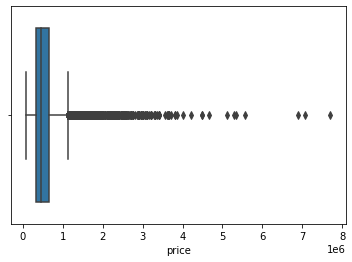

In [32]:
sns.boxplot(house_df['price']);

Filtering out outliers of price in the data

In [33]:
house_df = house_df[(house_df.price < house_df.price.quantile(0.995)) 
                        & (house_df.price > house_df.price.quantile(.005))]

### outliers in the number of bedrooms column

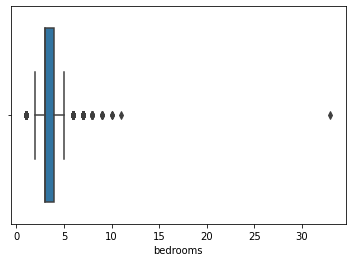

In [34]:
sns.boxplot(house_df['bedrooms']);

We see the outlier on bedrooms that we change to 3 bedrooms, likely due to a typographic error

In [35]:
house_df.loc[(house_df.bedrooms == 33), 'bedrooms'] = 3

### outliers in the living area column

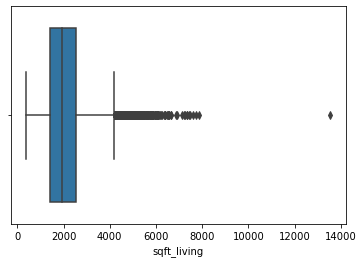

In [36]:
sns.boxplot(house_df['sqft_living']);

Filtering out outliers of living area column

In [37]:
house_df = house_df[(house_df.sqft_living < house_df.sqft_living.quantile(0.995)) 
                        & (house_df.sqft_living > house_df.sqft_living.quantile(.005))]

# Checking correlations and multicollinearity

In [38]:
house_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
id,1.000000,-0.019779,0.002110,0.008021,-0.010258,-0.131709,0.019925,-0.026776,0.010681,-0.008229,-0.004274,0.023419,-0.009396,-0.007622,-0.002076,0.021869,-0.001419,-0.144001,-0.023269,-0.009411,0.003010,-0.002589,0.014824,0.022958,0.000980,-0.012661,0.011838,0.003002,-0.000357
price,-0.019779,1.000000,0.300410,0.488724,0.665371,0.081658,0.262789,0.040181,0.667165,0.565844,0.267239,0.037737,0.121237,-0.036206,0.352550,0.019842,0.587594,0.071539,-0.037623,0.120889,0.166258,0.164243,0.153788,0.233097,0.098717,0.191153,0.029579,0.013762,-0.029861
bedrooms,0.002110,0.300410,1.000000,0.505859,0.588975,0.021749,0.163765,0.019506,0.328598,0.473250,0.282174,0.144905,0.019031,-0.149216,-0.020453,0.130155,0.382673,0.020121,-0.145026,0.018746,0.142229,-0.019999,0.037373,0.015143,0.018909,0.042081,-0.004553,0.009482,0.001714
bathrooms,0.008021,0.488724,0.505859,1.000000,0.732121,0.065294,0.501679,-0.136143,0.635190,0.655919,0.232481,0.513508,0.045043,-0.198489,0.012204,0.224684,0.543702,0.064370,-0.513902,0.044588,0.138182,0.025968,0.077002,0.065139,0.033955,0.099918,-0.014581,0.025697,-0.012183
sqft_living,-0.010258,0.665371,0.588975,0.732121,1.000000,0.151920,0.349050,-0.066113,0.740388,0.859856,0.382727,0.322529,0.049420,-0.197324,0.041495,0.250358,0.751946,0.165066,-0.322981,0.049177,0.181232,0.045558,0.125699,0.108184,0.065563,0.147690,-0.013849,0.027086,-0.012137
sqft_lot,-0.131709,0.081658,0.021749,0.065294,0.151920,1.000000,-0.013547,-0.005654,0.097487,0.163662,-0.000567,0.045926,0.006368,-0.128239,-0.091983,0.226337,0.136722,0.704826,-0.045863,0.006483,-0.040551,0.019903,0.033616,0.012388,-0.008260,0.074728,0.007138,-0.014316,0.001280
floors,0.019925,0.262789,0.163765,0.501679,0.349050,-0.013547,1.000000,-0.272343,0.453204,0.529769,-0.275262,0.488914,0.003690,-0.055030,0.043841,0.122294,0.267894,-0.022102,-0.489228,0.003606,-0.269529,0.010524,0.001534,0.013839,-0.027088,0.014792,-0.013132,0.021099,-0.015039
condition,-0.026776,0.040181,0.019506,-0.136143,-0.066113,-0.005654,-0.272343,1.000000,-0.160886,-0.172461,0.177753,-0.369343,-0.055326,0.004138,-0.016349,-0.108798,-0.099440,-0.000425,0.368578,-0.054897,0.130925,0.015313,0.025961,0.035222,0.021506,0.014207,-0.030859,0.038076,-0.015012
grade,0.010681,0.667165,0.328598,0.635190,0.740388,0.097487,0.453204,-0.160886,1.000000,0.734373,0.109361,0.448539,0.012001,-0.177922,0.106273,0.199784,0.699109,0.104752,-0.449016,0.011627,0.019744,0.040685,0.112413,0.102866,0.043252,0.133724,-0.008947,0.032677,-0.016919
sqft_above,-0.008229,0.565844,0.473250,0.655919,0.859856,0.163662,0.529769,-0.172461,0.734373,1.000000,-0.134271,0.433172,0.017776,-0.264152,-0.015167,0.358711,0.722616,0.177463,-0.433524,0.017697,-0.257937,0.024425,0.063133,0.055668,0.016159,0.077470,-0.014688,0.027005,-0.011587


### creating a function that takes in our dataframe and returns corellations between column in pair in descending order

In [39]:
def get_correlation_df(df):
    corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
    corr_df.set_index(['pairs'], inplace=True)
    corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
    corr_df.columns = ['cc']
    corr_df = corr_df.drop_duplicates()
    return corr_df.head(50)

**let call our function on our dataframe**

In [40]:
get_correlation_df(house_df)

,cc
pairs,
"(id, id)",1.000000
"(yr_renovated, renovated)",0.999968
"(yr_built, age)",0.999873
"(sqft_above, sqft_living)",0.859856
"(has_basement, sqft_basement)",0.833050
"(sqft_living15, sqft_living)",0.751946
"(sqft_living, grade)",0.740388
"(grade, sqft_above)",0.734373
"(bathrooms, sqft_living)",0.732121


### we will drop columns that have strong multicollinearity or provide no use to the model

In [41]:
house_df = house_df.drop(columns=['id', 'yr_renovated', 'sqft_above', 'sqft_living15', 'yr_built', 'sqft_basement', 'sqft_lot15', 'date', 'long', 'lat', 'zipcode'], axis=1)
house_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
0,221900.0,3,1.00,1180,5650,1.0,3,7,59,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,63,1,1,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,3,6,82,0,0,0,0,0,0,0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,5,7,49,0,1,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,3,8,28,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,3,8,5,0,0,0,0,0,0,0,1,0,0
21593,400000.0,4,2.50,2310,5813,2.0,3,8,1,0,0,0,0,0,0,0,0,0,1
21594,402101.0,2,0.75,1020,1350,2.0,3,7,5,0,0,0,0,0,0,0,0,1,0
21595,400000.0,3,2.50,1600,2388,2.0,3,8,11,0,0,0,0,0,0,0,0,0,1


There is still some multicollinearity between predictor variable, but not strong enough to initially drop on our models.

### we want to visualize the collinearity using plots

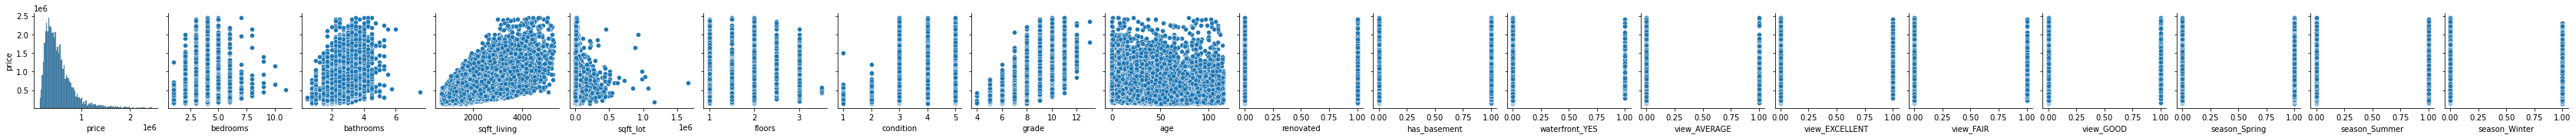

In [42]:
# Visualizing how each variable distributes? with price
sns.pairplot(house_df, y_vars='price');

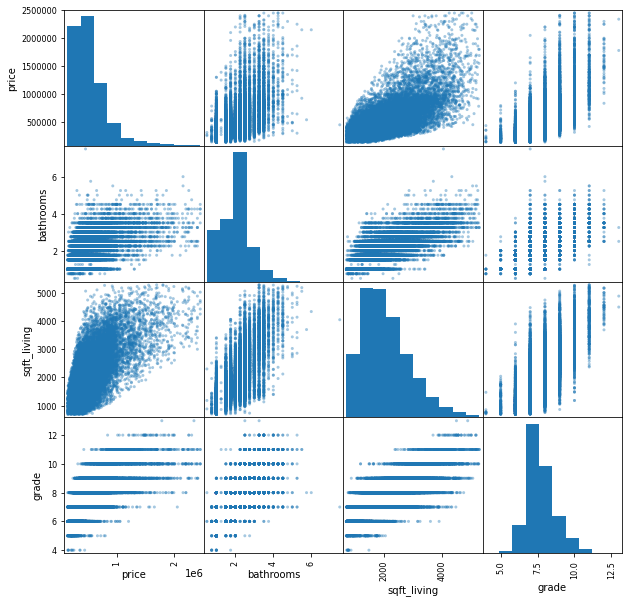

In [43]:
# A further look at certain attributes
attributes = ['price', 'bathrooms', 'sqft_living', 'grade']

pd.plotting.scatter_matrix(house_df[attributes], figsize = [10, 10], alpha=0.4);
plt.show()

we dont notice any problems with multicollinearity

# REGRESSION MODELLING 

Regression is, in my opinion, the finest algorithm to try in this experiment. Based on the values of the independent variables, regression is a supervised learning process used to forecast the value of a dependent variable. In this instance, we're attempting to estimate the impact that various property characteristics have on our dependent variable, the homes' prices. As a result, we will be able to offer our stakeholders a model that can foretell the key characteristics of homes that will have the most effects on their prices.

We will also use multiple linear regression because we are working with numerous features. Contrary to linear regression, which only employs one independent variable, multiple linear regression uses the values of many independent variables to predict the value of a dependent variable. 



# Building a Baseline Model

We will first start by building a baseline model. The baseline model will be used to compare the performance of the other models that we will be building. After that, we will build our multiple linear regression model.

The target variable is price. Therefore, we look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with price.

In [44]:
corr = house_df.corr()['price'].sort_values(ascending=False)
corr

price             1.000000
grade             0.667165
sqft_living       0.665371
bathrooms         0.488724
bedrooms          0.300410
floors            0.262789
view_EXCELLENT    0.233097
view_GOOD         0.191153
has_basement      0.166258
waterfront_YES    0.164243
view_AVERAGE      0.153788
renovated         0.120889
view_FAIR         0.098717
sqft_lot          0.081658
condition         0.040181
season_Spring     0.029579
season_Summer     0.013762
season_Winter    -0.029861
age              -0.037623
Name: price, dtype: float64

We can see that the 'price' column and the'sqft_living' column have the strongest association. This is understandable given that a large portion of a house's price is determined by its size. In order to see the relationship between "sqft_living" and "price," we will also make a scatter plot.


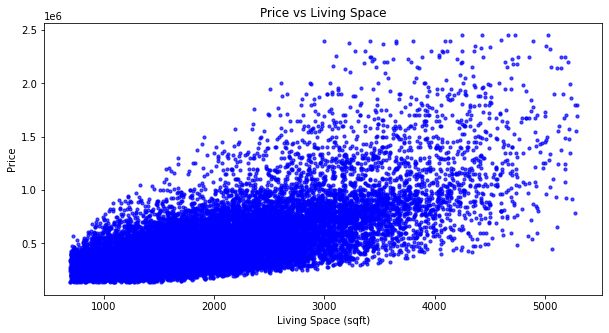

In [45]:
# Plot a scatter plot of the 'price' column against the 'sqft_living' column
plt.figure(figsize=(10, 5))
plt.scatter(house_df['sqft_living'], house_df['price'], color='b', alpha=0.7, s=10)
plt.title('Price vs Living Space')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price');

We may now declare the variables y and X_baseline, where y is a Series with pricing data and X_baseline is a DataFrame with the column with the highest correlation ('sqft_living').


In [46]:
y = house_df['price']

X_baseline = house_df[['sqft_living']]

we'll use our variables to build and fit a simple linear regression model

In [47]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

**lets evaluate the model**

In [48]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                 1.681e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:15:56   Log-Likelihood:            -2.9077e+05
No. Observations:               21167   AIC:                         5.815e+05
Df Residuals:                   21165   BIC:                         5.816e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.988e+04   4119.498      7.252      

**lets interpret the results**

In [49]:
baseline_results.rsquared

0.4427183965934772

R-squared: This represents the proportion of the variance in the target variable (price) that can be explained by the independent variable (sqft_living). Here, R-squared is 0.443, which means that approximately 44.3% of the variance in housing prices can be explained by the square footage of the living area.

In [50]:
baseline_results.f_pvalue

0.0

The p-value of the f-statistic is extremely small (p < 0.001), indicating that the regression model is significant overall and that the independent variable (sqft_living) is a good predictor of the dependent variable (price). 

In [51]:
baseline_results.pvalues

const          4.237554e-13
sqft_living    0.000000e+00
dtype: float64

the p-value for the sqft_living and const coefficients is 4.237554e-13 and 0.000000e+00 respectively are well below the significance level, indicating that they are both statistically significant.



In [52]:
baseline_results.params

const          29875.975456
sqft_living      240.993935
dtype: float64

In this case, we have one independent variable, so we have one coefficient, which is 240.9939. This means that for each one-unit increase in square footage of the living area, the housing price increases by $240.99, holding other variables constant.

the estimated intercept value is $29,880. However, since in the context of the problem, the independent variable (sqft_living) cannot be zero, this interpretation is not particularly useful.

Confidence Intervals: These show the range within which we can be 95% confident that the true coefficient lies. Here, we can be 95% confident that the true coefficient for sqft_living is between 237.351 and 244.637.

### We can plot the regression line on top of the scatter plot earlier to see how well the model fits the data.

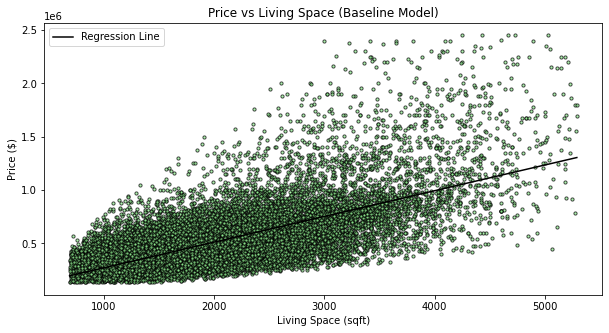

In [53]:
# Plot a scatter plot of the 'price' column against the 'sqft_living' column
plt.figure(figsize=(10, 5))

# Plot the regression line of the baseline model
x = np.linspace(house_df.sqft_living.min(), house_df.sqft_living.max(), 100)
Y_predicted = baseline_results.params[0] + baseline_results.params[1] * x

plt.plot(x, Y_predicted, color='black', label='Regression Line')

plt.scatter(X_baseline, y, color='lightgreen', alpha=0.7, s=10, edgecolors='black')
plt.title('Price vs Living Space (Baseline Model)')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price (\$)')
plt.legend();

### Calculate the mean absolute error of the baseline model

In [54]:
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

159750.3789652195

This means that on average, the model's predictions for the price of a house are off by about $159,750. 

This is a relatively large error, considering that the average price of a house in the dataset is around $540,000. Therefore, the model's predictions may not be very accurate and may need to be improved by either selecting additional features or by trying a different type of model.

# Build Iterated Multiple Linear Regression Model

We will now iterate the baseline model by building a multiple linear regression model that will have more than one independent variable.

**We will start by creating a new dataframe that will contain all of the features that we want to have in our model.**

In [55]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'age', 'renovated', 'has_basement',
       'waterfront_YES', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [56]:
X_iterated = house_df.drop(columns='price')
X_iterated.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'age', 'renovated', 'has_basement',
       'waterfront_YES', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

**We will now build our multiple linear regression model.**

In [57]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

**lets evaluate the model**

In [58]:
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2036.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:15:58   Log-Likelihood:            -2.8631e+05
No. Observations:               21167   AIC:                         5.727e+05
Df Residuals:                   21148   BIC:                         5.728e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.946e+05   1.52e+04    -65.

**lets interpret the results**

First, we can see that the R-squared value for this model is 0.634, which means that the model explains about 63.4% of the variance in the target variable (price). This is a significant improvement over the previous model which had an R-squared value of   0.443.

The F-statistic of 2036 and the corresponding p-value of 0.00 indicate that the overall model is statistically significant, meaning that at least one of the independent variables in the model is significantly related to the target variable.

The constant term (const) in this model is -994,600. This represents the predicted price of a house with all independent variables set to zero (which is not realistic for most variables).


**Now let's examine the feature coefficients.**

Each coefficient represents the change in the target variable associated with a one-unit change in the corresponding independent variable, holding all other variables constant.

The coefficient for the bedrooms variable is -26,120, which means that for each additional bedroom, the predicted price of the house decreases by \\$26,120, holding all other variables constant.

The coefficient for the bathrooms variable is \\$36,100, which means that for each additional bathroom, the predicted price of the house increases by \\$36,100, holding all other variables constant.

The coefficient for the square footage of the living area (sqft_living) is 123.8, which means that for each additional square foot of living area, the predicted price of the house increases by \\$123.80, holding all other variables constant.

The coefficient for the square footage of the lot (sqft_lot) is -0.0885, which means that for each additional square foot of lot size, the predicted price of the house decreases by $0.0885, holding all other variables constant.

The coefficient for the floors variable is \\$39,150, which means that for each additional floor, the predicted price of the house increases by \\$39,150, holding all other variables constant.

The coefficient for the condition variable is \\$21,030, which means that for each unit increase in the condition rating (on a scale of 1-5), the predicted price of the house increases by \\$21,030, holding all other variables constant.

The coefficient for the grade variable is \\$128,000, which means that for each unit increase in the grade rating (on a scale of 1-13), the predicted price of the house increases by \\$128,000, holding all other variables constant.

The coefficient for the age variable is \\$3,264.43, which means that for each additional year of age of the house, the predicted price of the house increases by \\$3,264.43, holding all other variables constant.

The coefficient for the renovated variable is \\$25,880, which means that if the house has been renovated, the predicted price of the house increases by \\$25,880, holding all other variables constant.

The coefficient for the has_basement variable is \\$16,810, which means that if the house has a basement, the predicted price of the house increases by \\$16,810, holding all other variables constant.

The coefficient for the waterfront_YES variable is \\$236,700, which means that if the house has a waterfront view, the predicted price of the house increases by \\$236,700 compared to waterfront_NO (which was the reference waterfront).

The coefficients for the view variables (view_AVERAGE, view_EXCELLENT, view_FAIR, and view_GOOD) represent the additional price associated with each respective view rating, holding all other variables constant.The coefficients for  all 'view' categories are positive, indicating that homes  better view ratings tend to have higher prices compared to view_NONE (which was the reference view)

The coefficient for 'season_Spring' is also positive, indicating that homes tend to sell for higher prices during spring compared to fall (which was the reference season). On the other hand, the coefficients for 'season_Summer' and 'season_Winter' are not statistically significant, indicating that there is no evidence that homes sell for higher prices in summer or winter compared to fall.

We can also see that some variables have a stronger effect than others. For example, the coefficient for the waterfront view variable is much larger than the coefficients for the other variables, indicating that having a waterfront view is a very significant factor in determining the price of a house.

Overall, this model provides a more comprehensive understanding of the factors that affect the price of a house, and can be used to make more accurate predictions of house prices based on the characteristics of the house.

**RMSE measure of how well the model is able to predict the outcome variable**

In [59]:
rmse = ((iterated_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

181221.60419680507

For this specific RMSE value, it means that our model is off by about 181k us dollars in a given prediction.

### plotting a partial regression plot for our model for each predictor variable

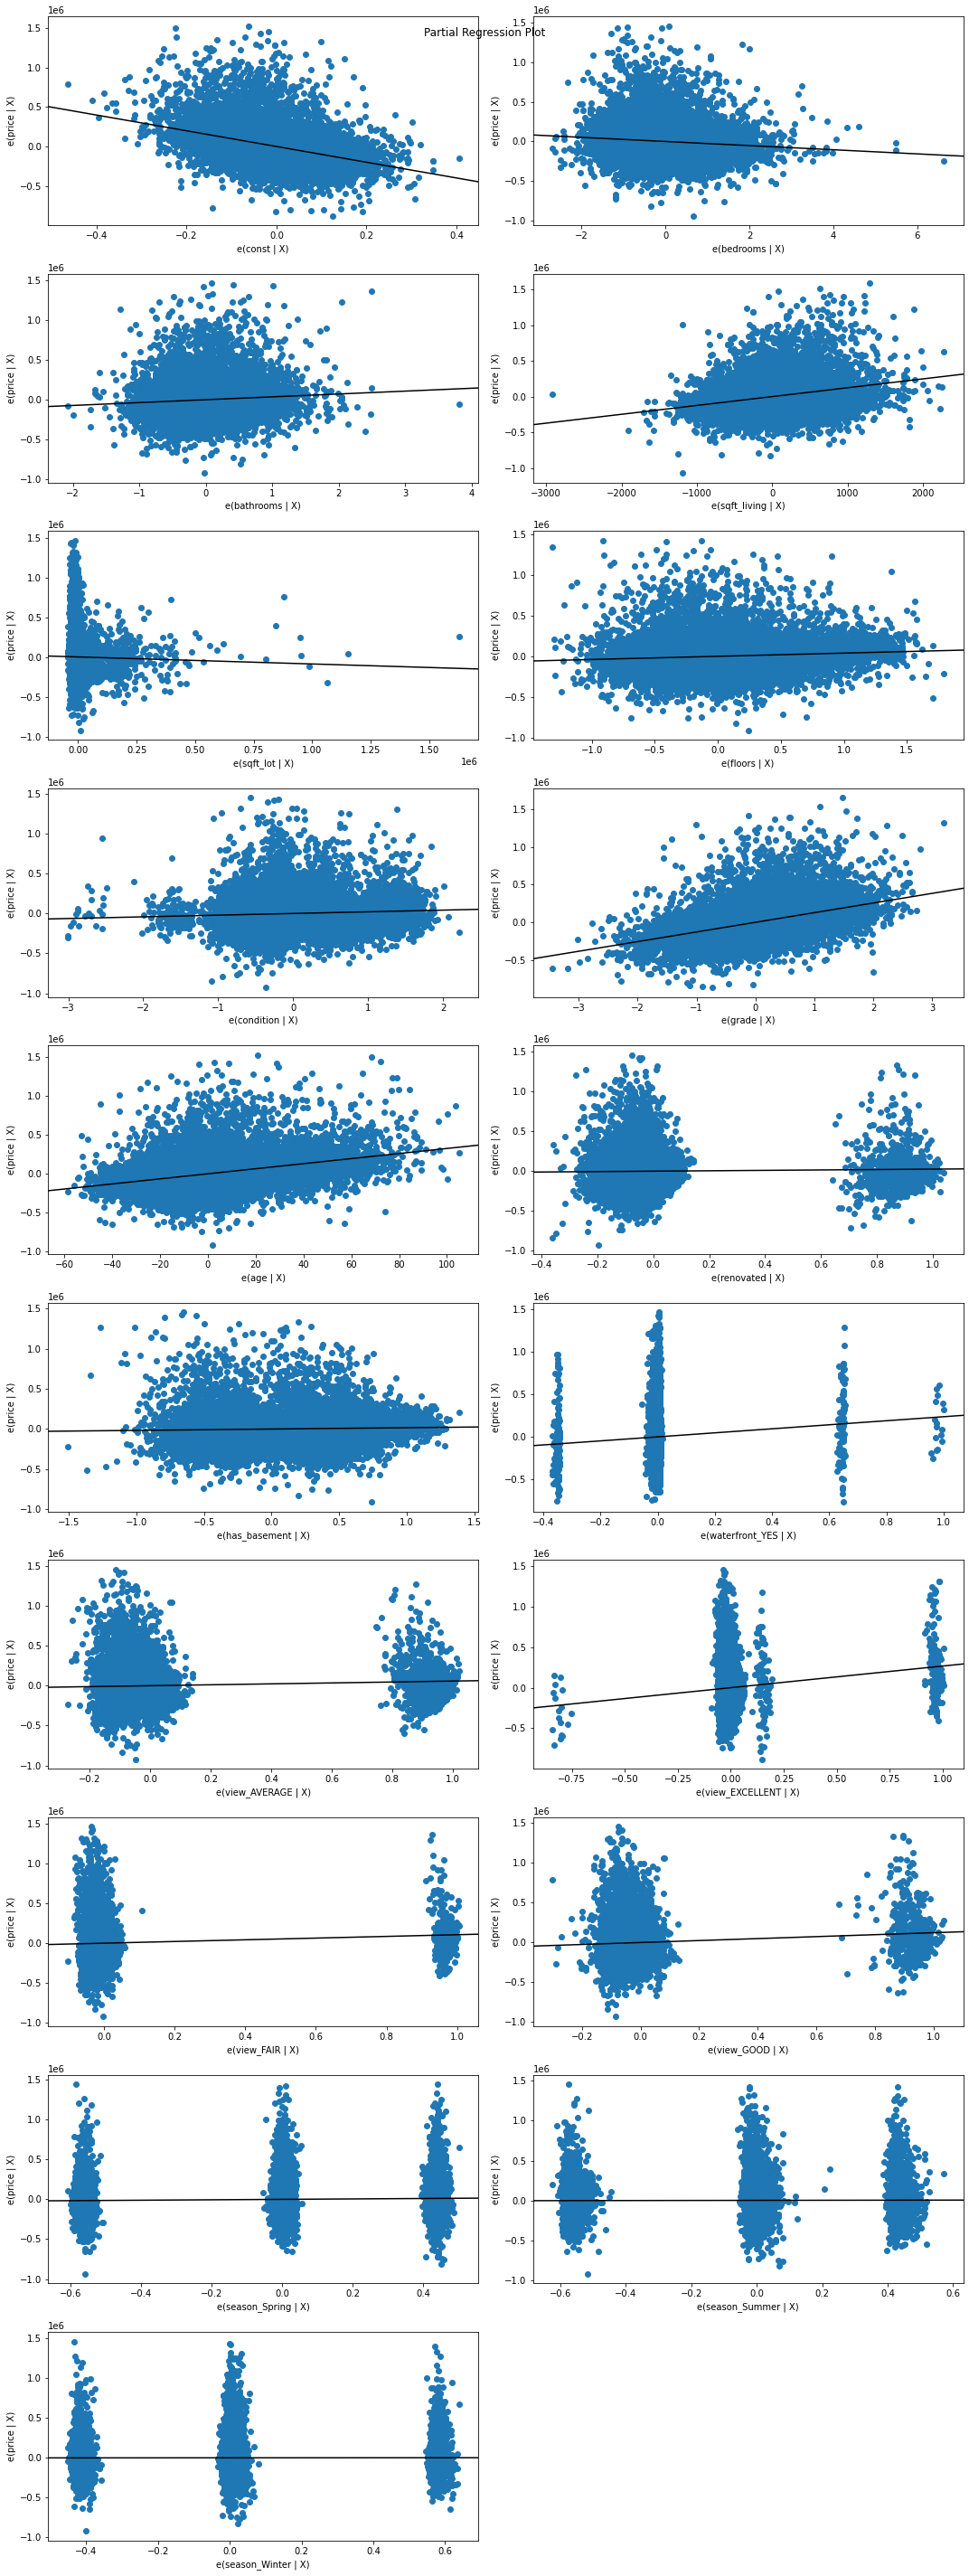

In [60]:
# create partial regression plots for each predictor variable
fig = plt.figure(figsize=(15,40))
sm.graphics.plot_partregress_grid(iterated_results, fig=fig)
plt.tight_layout()
plt.show()

### statistical test for homoscedasticity 

the Goldfeld-Quandt test, which divides the dataset into two groups, then finds the MSE of the residuals for each group. The ratio of the second group's mse_resid divided by the first group's mse_resid becomes a statistic that can be compared to the f-distribution to find a p-value

In [61]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [62]:
het_goldfeldquandt(y, X_iterated.values, alternative='two-sided')

(1.0589291480428877, 0.0032560392244241248, 'two-sided')

For the auto MPG data, we have a p-value of about 0.0032560392244241248, so we reject the null hypothesis at an alpha of 0.05. This means we consider the King County House data to be heteroscedastic.

### test for the Normality Assumption

***Q-Q (quantile-quantile) plot*** is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other

In [63]:
import scipy.stats as stats

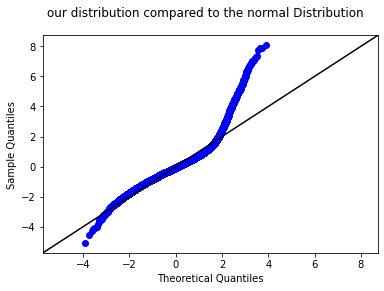

In [64]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(iterated_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("our distribution compared to the normal Distribution");

We see that the middle looks ok, but the ends, especially the higher end, are diverging from a normal distribution.

# Building an Iterated Log-Transformed Model

We will use a non_linear transformation technique Log transformations are one of several different techniques that fundamentally reshape the modeled relationship between the variables

The reason to apply this kind of transformation is that we believe that the underlying relationship is not linear. Then by applying these techniques, we may be able to model a linear relationship between the transformed variables

**Log Transforming the numerical Features**

Let's try building a model that uses the log of numerical features rather than the raw values

In [65]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
0,221900.0,3,1.00,1180,5650,1.0,3,7,59,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,63,1,1,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,3,6,82,0,0,0,0,0,0,0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,5,7,49,0,1,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,3,8,28,0,0,0,0,0,0,0,0,0,1


 our numerical_features are ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'age']

**log-transform the columns with a small constant added to avoid negative or 0 values**

In [66]:
house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'age']] = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'age']].apply(lambda x: np.log(x + 1e-8))
#preview
house_df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
0,221900.0,1.098612,1.000000e-08,7.073270,8.639411,1.000000e-08,3,7,4.077537,0,0,0,0,0,0,0,0,0,0
1,538000.0,1.098612,8.109302e-01,7.851661,8.887653,6.931472e-01,3,7,4.143135,1,1,0,0,0,0,0,0,0,1
2,180000.0,0.693147,1.000000e-08,6.646391,9.210340,1.000000e-08,3,6,4.406719,0,0,0,0,0,0,0,0,0,1
3,604000.0,1.386294,1.098612e+00,7.580700,8.517193,1.000000e-08,5,7,3.891820,0,1,0,0,0,0,0,0,0,1
4,510000.0,1.098612,6.931472e-01,7.426549,8.997147,1.000000e-08,3,8,3.332205,0,0,0,0,0,0,0,0,0,1


In [67]:
house_df.isnull().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
condition          0
grade              0
age               12
renovated          0
has_basement       0
waterfront_YES     0
view_AVERAGE       0
view_EXCELLENT     0
view_FAIR          0
view_GOOD          0
season_Spring      0
season_Summer      0
season_Winter      0
dtype: int64

##### mean imputation for the missing values in the age column

In [68]:
house_df['age'] = house_df['age'].fillna(house_df['age'].mean())



declare the variable X_log_iterated

In [69]:
X_log_iterated=  house_df.drop(columns='price')
X_log_iterated.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
0,1.098612,1.000000e-08,7.073270,8.639411,1.000000e-08,3,7,4.077537,0,0,0,0,0,0,0,0,0,0
1,1.098612,8.109302e-01,7.851661,8.887653,6.931472e-01,3,7,4.143135,1,1,0,0,0,0,0,0,0,1
2,0.693147,1.000000e-08,6.646391,9.210340,1.000000e-08,3,6,4.406719,0,0,0,0,0,0,0,0,0,1
3,1.386294,1.098612e+00,7.580700,8.517193,1.000000e-08,5,7,3.891820,0,1,0,0,0,0,0,0,0,1
4,1.098612,6.931472e-01,7.426549,8.997147,1.000000e-08,3,8,3.332205,0,0,0,0,0,0,0,0,0,1


#### Model with a Log Transformed Features

In [70]:
X_log_iterated_model = sm.OLS(y, sm.add_constant(X_log_iterated))
X_log_iterated_results = X_log_iterated_model.fit()

**lets evaluate the model**

In [71]:
print(X_log_iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     1537.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:16:05   Log-Likelihood:            -2.8810e+05
No. Observations:               21167   AIC:                         5.762e+05
Df Residuals:                   21148   BIC:                         5.764e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.337e+06   4.08e+04    -57.

**lets interpret the results**

The log-transformed features have improved the R-squared value of the model, indicating that the model is better at explaining the variability of the response variable. 

The coefficients of the log-transformed features can be interpreted as follows:

bedrooms: For each increase of 1% in the number of bedrooms, we see a decrease of $478.2 in the price (coefficient is negative).

bathrooms: For each increase of 1% in the number of bathrooms, we see a decrease of $837.6 in the price.

sqft_living: For each increase of 1% in the square footage of living space, we see an increase of $2510 in the price.

sqft_lot: For each increase of 1% in the size of the lot, we see a decrease of $210 in the price.

floors: For each increase of 1% in the number of floors, we see an increase of $159.9 in the price.

age: For each increase of 1% in the age of the house, we see an increase of $23.22 in the price.

All other variables in the model have been transformed as well, and the interpretation of their coefficients remains the same as in the previous model.

# Conclusion

we will choose the second model as our best model and use in our recommendations

# Recommendations

Bathrooms: The number of bathrooms has a positive effect on the price of the house, meaning that houses with more bathrooms tend to be priced higher. The agency may want to consider this factor when pricing and marketing homes with more bathrooms.

Living Area and Lot Size: The size of the living area has a positive effect on the price of the house, while the size of the lot has a negative effect. The agency may want to consider emphasizing the living area in their marketing efforts, while also being mindful of the lot size.

Floors: Houses with more floors tend to be priced higher. The agency may want to consider this factor when pricing and marketing multi-story homes.

Condition and Grade: Houses with higher condition and grade ratings tend to be priced higher. The agency may want to emphasize these ratings in their marketing efforts and pricing strategy.

Age and Renovated: The age of the house and whether or not it has been renovated both have significant effects on the price of the house. The agency may want to consider these factors when pricing and marketing homes, particularly when comparing newer, renovated homes to older ones.

Waterfront View: Houses with a waterfront view are priced significantly higher than those without. The agency may want to emphasize this factor in their marketing efforts for waterfront properties.

Season: The season in which a house is sold can also affect the price, with spring selling for higher prices than fall. The agency may want to consider this factor when planning their marketing and pricing strategies throughout the year.

# Limitations

Some limitations of this model and analysis could include:

Limited variables: While this model includes many important variables that are known to impact house prices, there may be other factors that were not included in the analysis that could also have an effect on house prices.

Assumptions: The model assumes a linear relationship between the independent variables and the target variable. This may not always be the case, and there could be more complex, non-linear relationships between the variables that are not captured in this analysis.

Generalizability: The dataset used for this analysis was limited to a specific geographic area and time period. It may not be representative of other locations or time periods, which could limit the generalizability of the results.The data in the dataset is from 2014 and 2015. Therefore, it may not be able to account for changes in the housing market since then. As a result the model may not be able to predict the value of a house in 2022. 

Causality: While the model can identify relationships between variables, it cannot prove causality. Therefore, it's important to be cautious about making causal claims based solely on the results of this model.

In order to improve the value of a house, we would need to understand the market (i.e. what buyers are looking for). Therefore, by not having this information, we are unable to advise our clients on the best renovations to make. It is possible to build the most expensive house in the world, but if it is not what buyers are looking for, then it will not be sold. There is no value in that.